### Student Information
Name: 林劭芸

Student ID: 113033626

GitHub ID: dabbie109303501

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [52]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### First
in master file

#### Second
Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

In [53]:
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
ds

DatasetDict({
    train: Dataset({
        features: ['sentiment', 'comment'],
        num_rows: 1500
    })
})

In [54]:
# Converting Dictionary into Pandas Dataframe
import pandas as pd
df=pd.DataFrame(
    {"sentiment":ds["train"]["sentiment"],
     "comment":ds["train"]["comment"]})
df

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [55]:
# Adding Columns
sentiments=['not nostalgia','nostalgia']
df['sentiments'] = [0 if s == sentiments[0] else 1 for s in df['sentiment']]
df

,sentiment,comment,sentiments
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1
...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",0
1496,not nostalgia,it's sad this is such a beautiful song when yo...,0
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",0
1498,nostalgia,I was born in 1954 and started to be aware of ...,1


In [56]:
# Familiarizing yourself with the Data
df[df["sentiments"]==0]

,sentiment,comment,sentiments
0,not nostalgia,He was a singer with a golden voice that I lov...,0
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
8,not nostalgia,Wherever you are you always in my heart,0
9,not nostalgia,Elvis will always be number one no one can com...,0
10,not nostalgia,ill bet if they begin to play this song on the...,0
...,...,...,...
1493,not nostalgia,"He really has that ""love you like a brother"" l...",0
1494,not nostalgia,That's funny. But Leo really is a nice guy. He...,0
1495,not nostalgia,"i don't know!..but the opening of the video,.....",0
1496,not nostalgia,it's sad this is such a beautiful song when yo...,0


In [57]:
# Missing Values
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiments
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [58]:
# Dealing with Duplicate Data
print(sum(df.duplicated()))
print(df[df.duplicated()==True])
df.drop_duplicates(keep=False, inplace=True)
print(sum(df.duplicated()))

1
        sentiment                                            comment  \
78  not nostalgia  never heard this song before... WOW What an am...   

    sentiments  
78           0  
0


sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


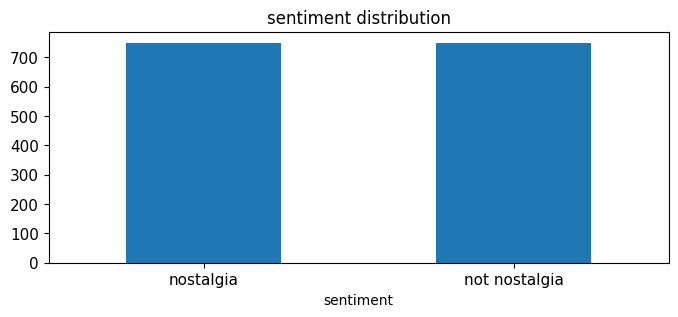

sentiment
nostalgia        257
not nostalgia    243
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

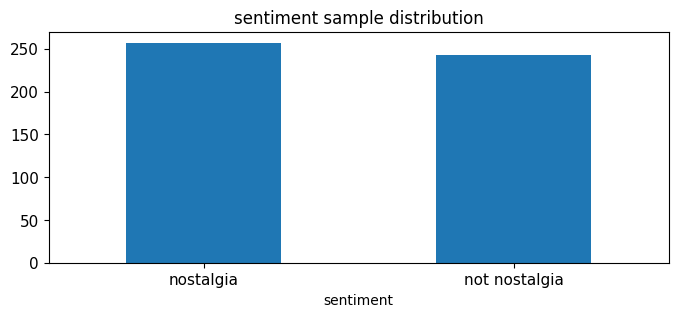

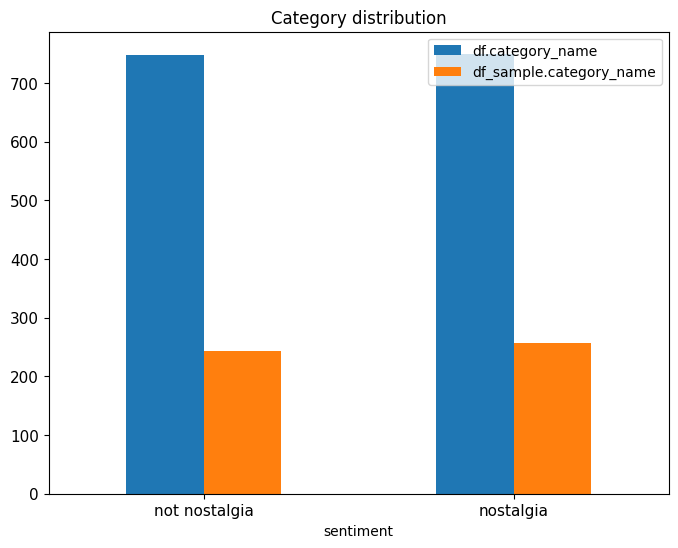

In [59]:
# Sampling
df_sample = df.sample(n=500)
df_sample[0:4]

import matplotlib.pyplot as plt
%matplotlib inline
print(df["sentiment"].value_counts())
df["sentiment"].value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',      
                                    rot = 0, fontsize = 11, figsize = (8,3))
plt.show()
print(df_sample["sentiment"].value_counts())
df_sample["sentiment"].value_counts().plot(kind = 'bar',
                                    title = 'sentiment sample distribution',      
                                    rot = 0, fontsize = 11, figsize = (8,3))
(pd.concat({'df.category_name': df, 'df_sample.category_name':\
            df_sample})
   .groupby(level=0)["sentiment"].value_counts()
   .unstack(0)
   .sort_index(ascending=False)
   .plot(kind = 'bar',
        title = 'Category distribution',       
        rot = 0, fontsize = 11, figsize = (8,6))
)

In [60]:
# Feature Creation
import nltk
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))
list(df[0:4]["unigrams"])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.'],
 ['The',
  'mist',
  'beautiful',
  'voice',
  'ever',
  'I',
  'listened',
  'to',
  'him',
  'when',
  'I',
  'was',
  'a',
  'kid',
  'and',
  'still',
  'love',
  'his',
  'singing',
  'Never',
  'forgotten',
  'The',
  'voice',
  'of',
  'an',
  'angel'],
 ['I',
  'have',
  'most',
  'of',
  'Mr.',
  'Reeves',
  'songs',
  '.',
  'Always',
  'love',
  '

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1
he
['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

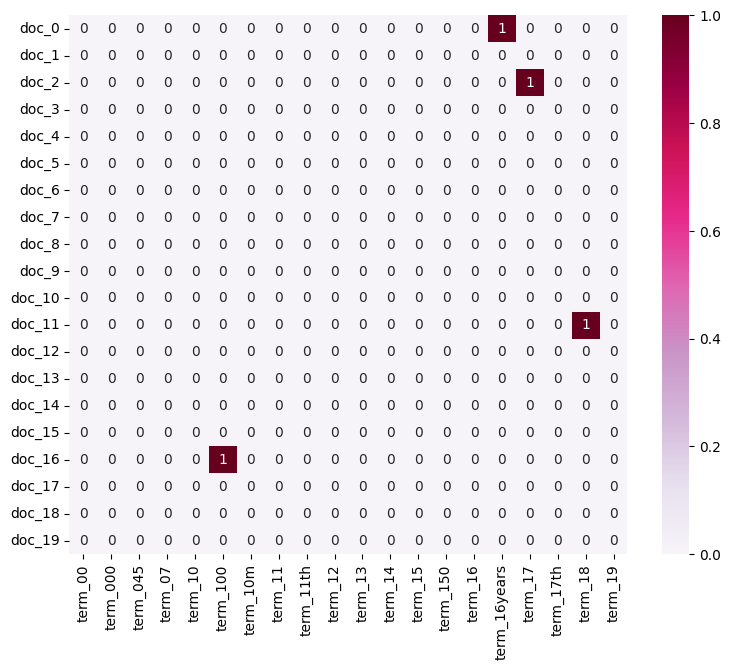

In [61]:
# Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df["comment"]) #learn the vocabulary and return document-term matrix
print(df_counts[0])
print(count_vect.get_feature_names_out()[1598])
analyze = count_vect.build_analyzer()
print(analyze("I am craving for a hawaiian pizza right now"))
print(df_counts[0:5, 0:100].toarray())

import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
plt.show()

C:\Users\dabbie\AppData\Local\Temp\ipykernel_11928\419922094.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



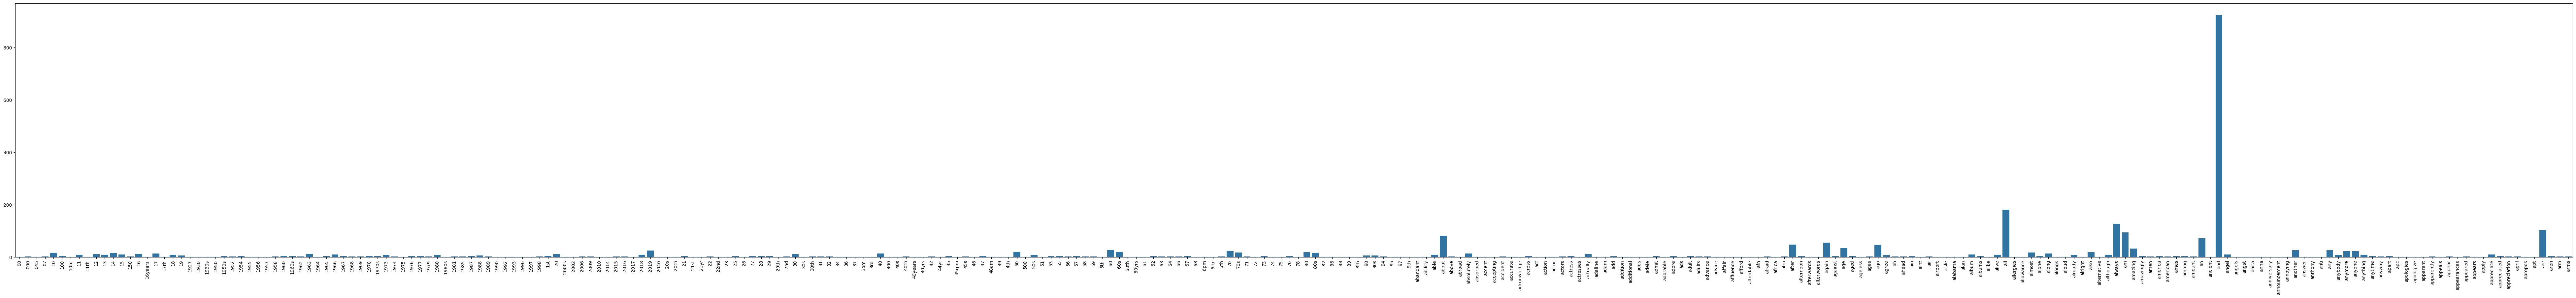

In [62]:
# Attribute Transformation / Aggregation
import numpy as np
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)
plt.show()

import plotly.express as px
import pandas as pd
d = pd.DataFrame(dict(
    count_vect = count_vect.get_feature_names_out()[:300],
    term_frequencies = term_frequencies[:300]))

fig = px.bar(d, x = 'count_vect', y = 'term_frequencies')
fig.show()

x=[];y=[]
for i in range(term_frequencies.shape[0]):
    if term_frequencies[i]>500:
       x=np.concatenate([x,count_vect.get_feature_names_out()[i:i+1]])
       y=np.concatenate([y,term_frequencies[i:i+1]])
d = pd.DataFrame(dict(
    count_vect = x,
    term_frequencies = y))
fig = px.bar(d, x = 'count_vect', y = 'term_frequencies')
fig.update_xaxes(categoryorder='total descending')
fig.show()

Filtered Term-Document Frequency DataFrame for Category not nostalgia:
     00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
743   0    0    0   0    0    0   0   0   0   0  ...         0           0   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0         

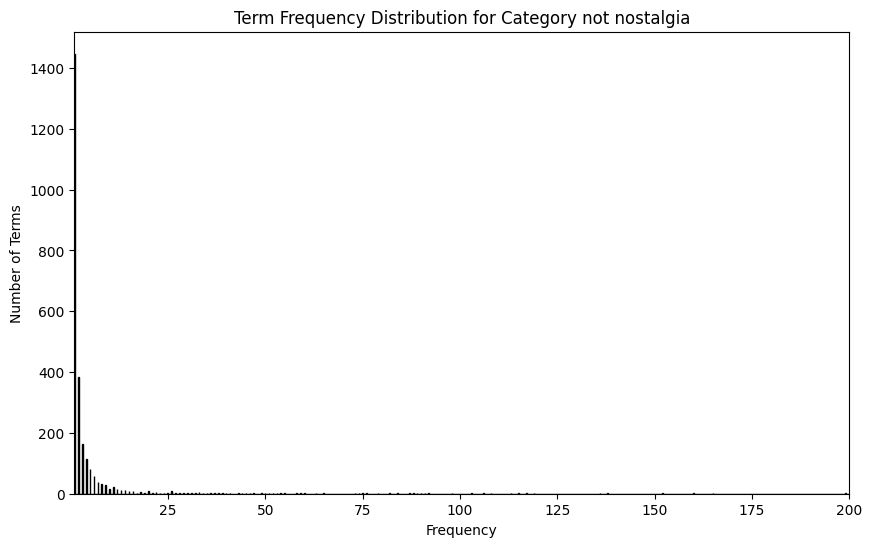

Filtered Term-Document Frequency DataFrame for Category not nostalgia:
     000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
743    0    0   0    0    0   0   0   0   0    0  ...        0         0   
744    0    0   0    0    0   0   0   0   0    0  ...        0         0   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters 

In [63]:
# Finding frequent patterns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df["sentiment"] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    df_counts = count_vect.fit_transform(df["comment"])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
print(term_document_dfs[categories[category_number]])

category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for category in categories:
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
print(filtered_term_document_dfs[categories[category_number]])

import os
os.environ['PYTHONIOENCODING'] = 'utf-8'
from PAMI.extras.convert.DF2DB import DF2DB

for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 584
Number of items : 13756
Minimum Transaction Size : 15
Average Transaction Size : 122.93493150684931
Maximum Transaction Size : 2603
Standard Deviation Transaction Size : 198.28098372213412
Variance in Transaction Sizes : 39382.784781127375
Sparsity : 0.9910631774129944


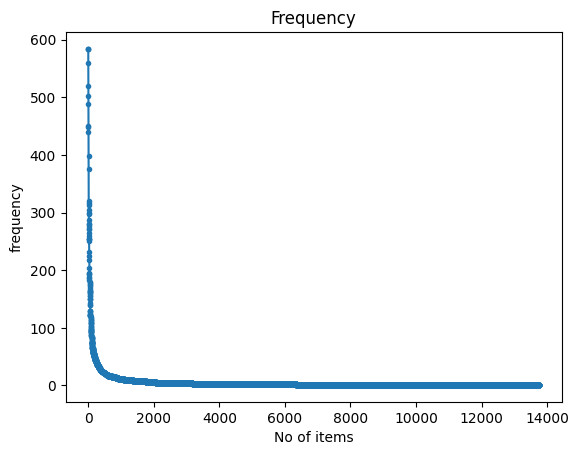

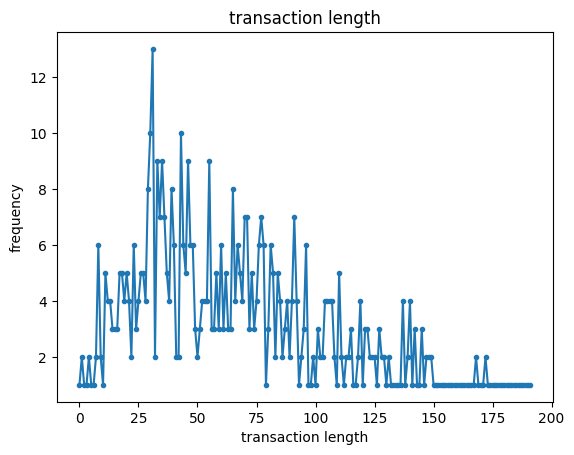

In [64]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [65]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=501
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()


Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [66]:
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [67]:
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()


Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [68]:
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()



Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [69]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for d in dfs:
    for pattern in d['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(d) for d in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for d in dfs:
    filtered_df = d[d['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                           Patterns Support
252              from subject lines     585
251                   subject lines     585
265              from lines subject     584
264                   lines subject     584
248               organization from     582
..                              ...     ...
152  to of the organization subject     501
4                from in to subject     501
3                     in to subject     501
2                        in to from     501
92     and to the organization from     501

[266 rows x 2 columns]
Number of patterns discarded: 36


In [70]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns'][100]:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,,t,o,h,e,s,u,b,j,c
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [71]:
# Dimensionality Reduction
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
df_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
df_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

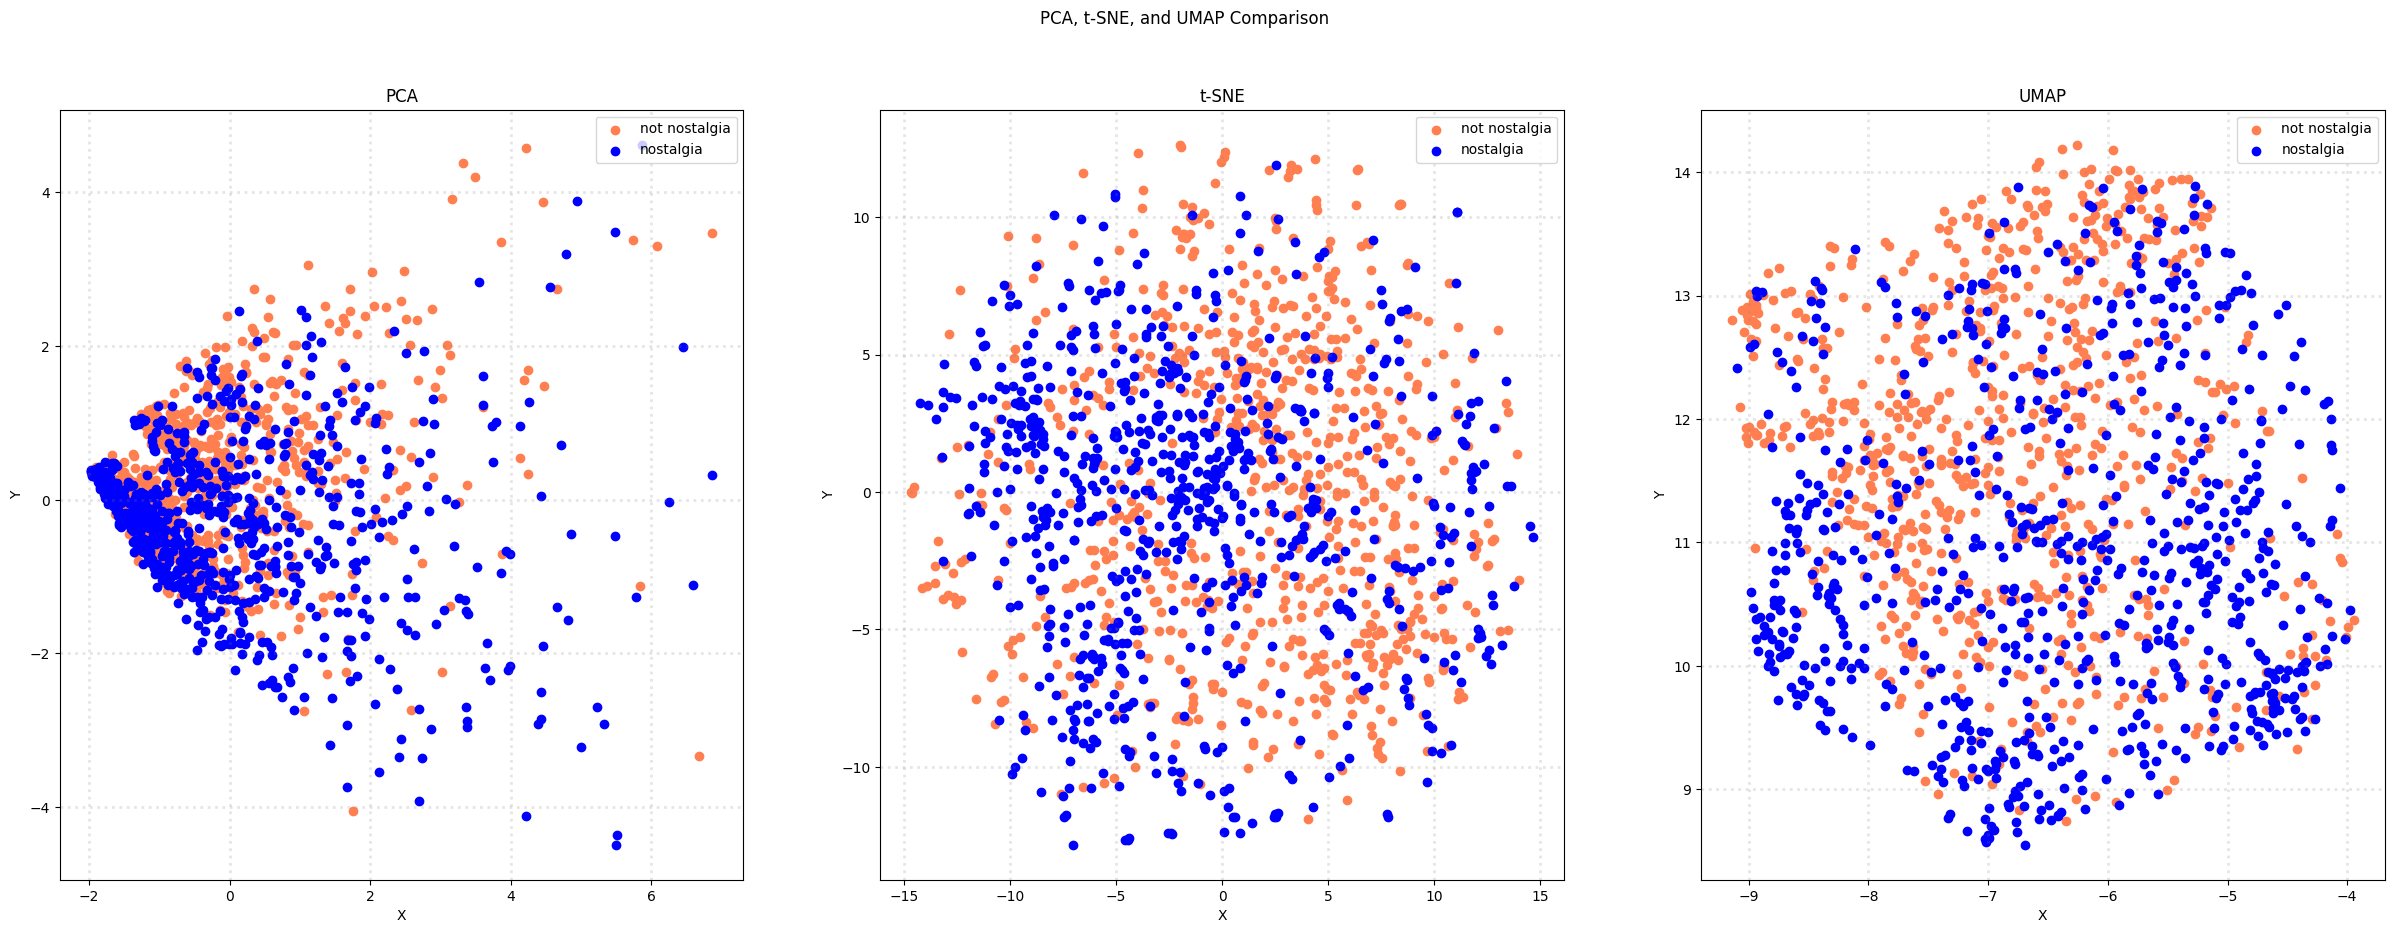

In [72]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

plt.show()

In [73]:
# Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(categories)
df['bin_category'] = mlb.transform(df['sentiment']).tolist()
df[0:5]

,sentiment,comment,sentiments,unigrams,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{Jim, Thank, You, still, a, you, at, emotional...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{kid, still, a, voice, of, and, love, an, his,...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{songs., a, is., Mr., at, graduated, comfortin...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{Thank, song, receive., 30, Nam, a, December, ...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m...","{of, played, me, him, everyday, to, songs, lis...",[0]


In [74]:
# Data Exploration
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)
document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)
document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

from sklearn.preprocessing import binarize
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)
# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)
# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)
# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']
Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\dabbie\AppData\Local\Temp\ipykernel_11928\1134968617.py:42: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\dabbie\AppData\Local\Temp\ipykernel_11928\1134968617.py:43: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\dabbie\AppData\Local\Temp\ipykernel_11928\1134968617.py:44: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\dabbie\AppData\Local\Temp\ipykernel_11928\1134968617.py:45: DeprecationWarning:

Conversion of an array with ndim >

In [75]:
# Data Classification
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['sentiments', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8286    0.9486    0.8845       214
    nostalgia     0.9463    0.8220    0.8798       236

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



#### Third
Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
- Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
- Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
- Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

In [76]:
df[0:3]

,sentiment,comment,sentiments,unigrams,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{Jim, Thank, You, still, a, you, at, emotional...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{kid, still, a, voice, of, and, love, an, his,...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{songs., a, is., Mr., at, graduated, comfortin...",[0]


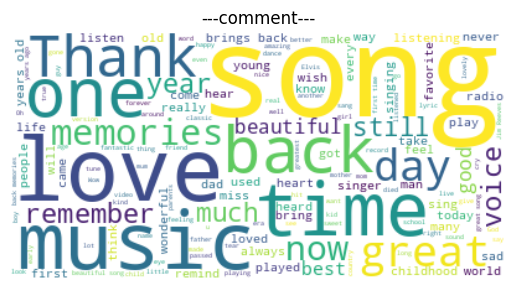

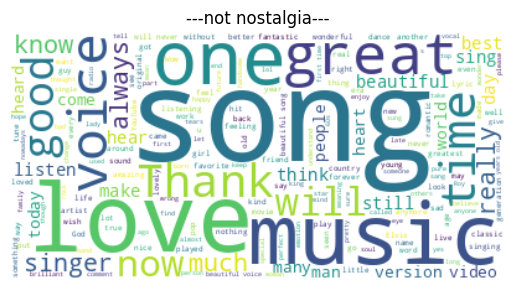

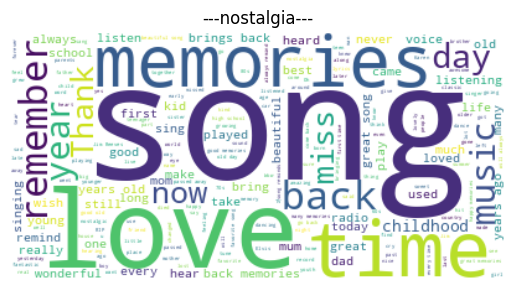

In [77]:
# Generate meaningful new data visualizations
# wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Start with one review:
text = " ".join(i for i in df["comment"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("---comment---")
plt.show()

text = " ".join(i for i in df[df["sentiments"]==0]["comment"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("---not nostalgia---")
plt.show()

text = " ".join(i for i in df[df["sentiments"]==1]["comment"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("---nostalgia---")
plt.show()

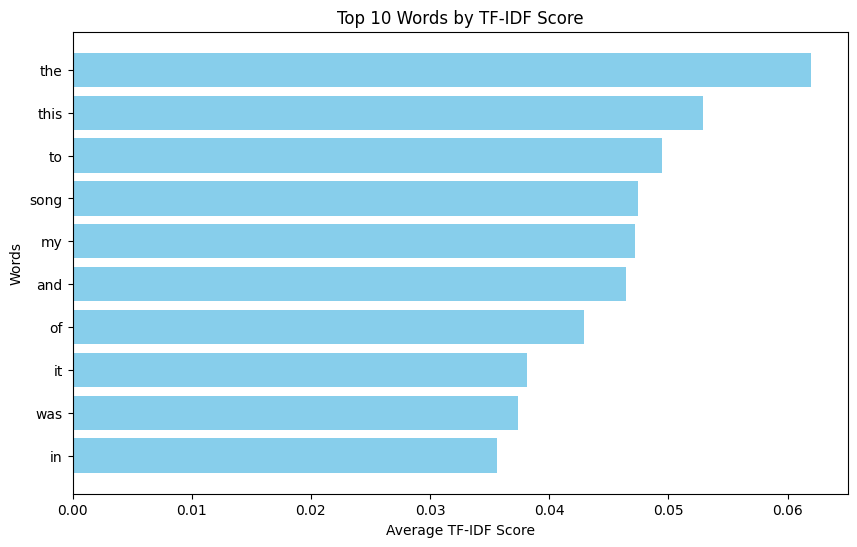

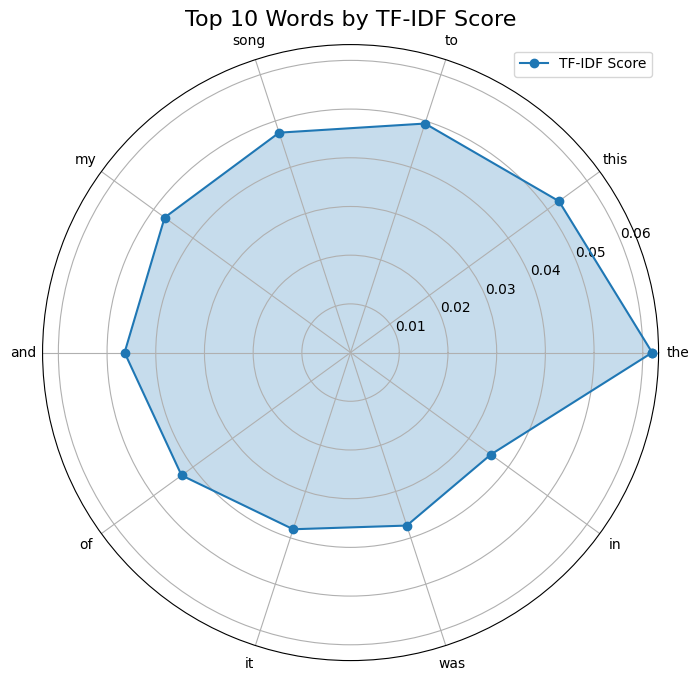

In [78]:
# Generate TF-IDF features from the tokens of each text.
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假設 df["comment"] 是您的文本欄位
tfidf = TfidfVectorizer()

# 計算 TF-IDF 矩陣
tfidf_matrix = tfidf.fit_transform(df["comment"])
feature_names = tfidf.get_feature_names_out()

# 計算每個詞的平均 TF-IDF 分數
tfidf_scores = tfidf_matrix.toarray().mean(axis=0)

# 將詞彙與平均分數配對，並按分數排序
tfidf_scores_df = pd.DataFrame({
    "word": feature_names,
    "avg_tfidf": tfidf_scores
}).sort_values(by="avg_tfidf", ascending=False)

# 取出前10高的詞彙
top_10_tfidf = tfidf_scores_df.head(10)

# 繪製前10高詞彙的條形圖
plt.figure(figsize=(10, 6))
plt.barh(top_10_tfidf["word"], top_10_tfidf["avg_tfidf"], color="skyblue")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Words")
plt.title("Top 10 Words by TF-IDF Score")
plt.gca().invert_yaxis()  # 反轉 y 軸，讓最高分的詞彙在上
plt.show()

# 計算每個詞的平均 TF-IDF 分數（假設 top_10_tfidf 已經排序並包含詞與分數）
angles = np.linspace(0, 2 * np.pi, len(top_10_tfidf), endpoint=False)
# 擴展角度範圍，使極座標圖閉合
angles = np.concatenate((angles, [angles[0]]))
scores = np.concatenate((top_10_tfidf["avg_tfidf"], [top_10_tfidf["avg_tfidf"].iloc[0]]))
# 開始繪圖
plt.figure(figsize=(8, 8))
plt.polar(angles, scores, marker='o', label='TF-IDF Score')
plt.fill(angles, scores, alpha=0.25)
# 設置極座標圖的標籤和標題
plt.xticks(angles[:-1], top_10_tfidf["word"], rotation=45)
plt.title('Top 10 Words by TF-IDF Score', fontsize=16)
plt.legend(loc='upper right')
plt.show()

In [79]:
# Implement a simple Naive Bayes classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df["comment"], df["sentiment"], test_size=0.2, random_state=42)

# CountVectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [80]:
# CountVectorizer + MultinomialNB
nb_count1 = MultinomialNB()
nb_count1.fit(X_train_count, y_train)
y_pred_count1 = nb_count1.predict(X_test_count)
print("Performance with CountVectorizer + MultinomialNB")
print(classification_report(y_test, y_pred_count1))

# TfidfVectorizer + MultinomialNB
nb_tfidf1 = MultinomialNB()
nb_tfidf1.fit(X_train_tfidf, y_train)
y_pred_tfidf1 = nb_tfidf1.predict(X_test_tfidf)
print("Performance with TfidfVectorizer + MultinomialNB")
print(classification_report(y_test, y_pred_tfidf1))


Performance with CountVectorizer + MultinomialNB
               precision    recall  f1-score   support

    nostalgia       0.82      0.94      0.87       148
not nostalgia       0.93      0.80      0.86       152

     accuracy                           0.87       300
    macro avg       0.87      0.87      0.87       300
 weighted avg       0.87      0.87      0.87       300

Performance with TfidfVectorizer + MultinomialNB
               precision    recall  f1-score   support

    nostalgia       0.80      0.94      0.87       148
not nostalgia       0.93      0.78      0.85       152

     accuracy                           0.86       300
    macro avg       0.87      0.86      0.86       300
 weighted avg       0.87      0.86      0.86       300



In [81]:
# CountVectorizer + Complement Naive Bayes
nb_count2 = ComplementNB()
nb_count2.fit(X_train_count, y_train)
y_pred_count2 = nb_count2.predict(X_test_count)
print("Performance with CountVectorizer + Complement Naive Bayes")
print(classification_report(y_test, y_pred_count2))

# TfidfVectorizer + Complement Naive Bayes
nb_tfidf2 = ComplementNB()
nb_tfidf2.fit(X_train_tfidf, y_train)
y_pred_tfidf2 = nb_tfidf2.predict(X_test_tfidf)
print("Performance with TfidfVectorizer + Complement Naive Bayes")
print(classification_report(y_test, y_pred_tfidf2))


Performance with CountVectorizer + Complement Naive Bayes
               precision    recall  f1-score   support

    nostalgia       0.82      0.94      0.87       148
not nostalgia       0.93      0.80      0.86       152

     accuracy                           0.87       300
    macro avg       0.87      0.87      0.87       300
 weighted avg       0.87      0.87      0.87       300

Performance with TfidfVectorizer + Complement Naive Bayes
               precision    recall  f1-score   support

    nostalgia       0.81      0.94      0.87       148
not nostalgia       0.93      0.78      0.85       152

     accuracy                           0.86       300
    macro avg       0.87      0.86      0.86       300
 weighted avg       0.87      0.86      0.86       300



Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

In [82]:
# inefficient parts
# 以這個資料集來說 因為sentiment欄位中的資料已經是二元分類了，只有not nostalgia和nostalgia兩種，而且沒有缺失值
# 所以sentiments和bin_category這兩欄可以擇一就好